<a href="https://colab.research.google.com/github/MLWhizKid/data-mining/blob/main/C4Dimension_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 从 google.colab 导入 drive
# Import drive from google.colab
from google.colab import drive

# 挂载 Google Drive
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
file_path = '/content/drive/MyDrive/data file/BostonHousing.csv'
housing_df = pd.read_csv(file_path)
housing_df = housing_df.rename(columns={'CAT. MEDV':'CAT_MEDV'})
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [5]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [7]:
housing_df['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

In [12]:
print('Mean: ',housing_df['CRIM'].mean())
print('STD.dev: ',housing_df['CRIM'].std())
print('Mean: ',housing_df['CRIM'].min())
print('Mean: ',housing_df['CRIM'].max())
print('Mean: ',housing_df['CRIM'].mean())
print('Length: ',len(housing_df['CRIM']))
print('Miss.val: ',housing_df.isnull().sum())


Mean:  3.613523557312254
STD.dev:  8.60154510533249
Mean:  0.00632
Mean:  88.9762
Mean:  3.613523557312254
Length:  506
Miss.val:  CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
LSTAT       0
MEDV        0
CAT_MEDV    0
dtype: int64


In [13]:
housing_df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [15]:
housing_df['RM_bin'] = pd.cut(housing_df['RM'],range(0,10),labels=False)
housing_df.groupby(['RM_bin','CHAS'])['MEDV'].mean()

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

In [17]:
pd.pivot_table(housing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'],
aggfunc=np.mean, margins=True)

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


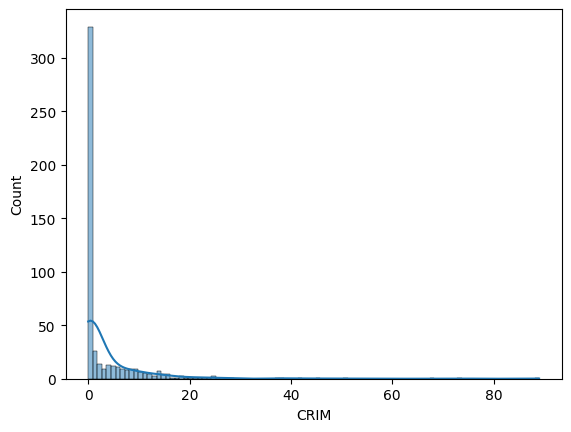

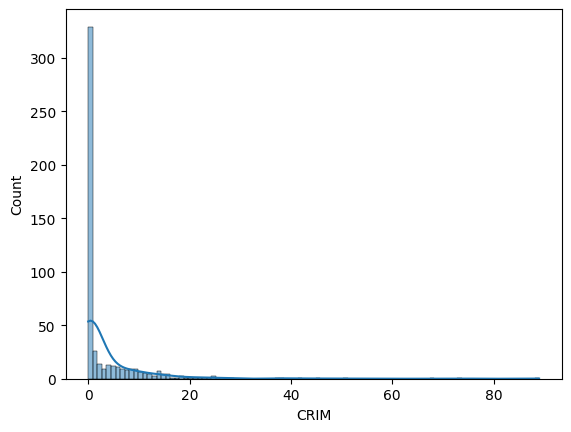

In [19]:
sns.histplot(data = housing_df,x = 'CRIM',kde=True)
plt.show()

In [21]:
corr = housing_df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV,RM_bin
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,-0.151987,-0.220737
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,0.365296,0.271870
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,-0.366276,-0.357415
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.108631,0.068701
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,-0.232502,-0.261580
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,0.641265,0.921914
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,-0.191196,-0.201550
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,0.118887,0.184265
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,-0.197924,-0.188128
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,-0.273687,-0.258530


import numpy as np
from google.colab import autoviz
df_9191849790522014970 = autoviz.get_df('df_9191849790522014970')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9191849790522014970, *['CRIM'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9191849790522014970 = autoviz.get_df('df_9191849790522014970')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9191849790522014970, *['ZN'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9191849790522014970 = autoviz.get_df('df_9191849790522014970')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9191849790522014970, *['INDUS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9191849790522014970 = autoviz.get_df('df_9191849790522014970')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_9191849790522014970, *['CHAS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9191849790522014970 = autoviz.get_df('df_9191849790522014970')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9191849790522014970, *['CRIM'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9191849790522014970 = autoviz.get_df('df_9191849790522014970')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9191849790522014970, *['ZN'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9191849790522014970 = autoviz.get_df('df_9191849790522014970')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9191849790522014970, *['INDUS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9191849790522014970 = autoviz.get_df('df_9191849790522014970')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_9191849790522014970, *['CHAS'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9191849790522014970 = autoviz.get_df('df_9191849790522014970')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_9191849790522014970, *[[['CRIM', 'ZN'], ['ZN', 'INDUS'], ['INDUS', 'CHAS'], ['CHAS', 'NOX']]], **{})
chart

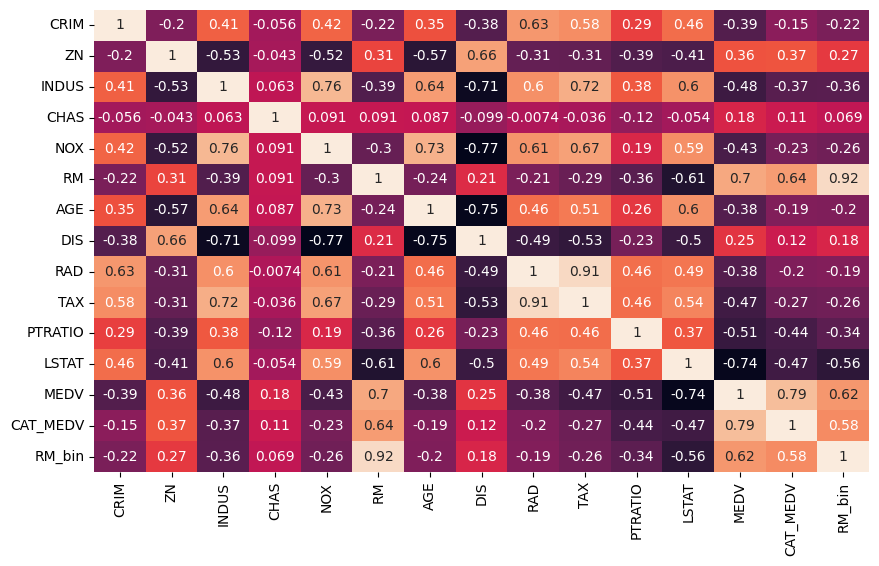

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr,annot = True ,cbar = False)
plt.show()

In [25]:
tbl = pd.crosstab(housing_df['CAT_MEDV'],housing_df['ZN'])
tbl.transpose()

CAT_MEDV,0,1
ZN,,
0.0,339,33
12.5,10,0
17.5,0,1
18.0,1,0
20.0,5,16
21.0,4,0
22.0,9,1
25.0,10,0
28.0,3,0


<ipython-input-27-7b277f77303d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])


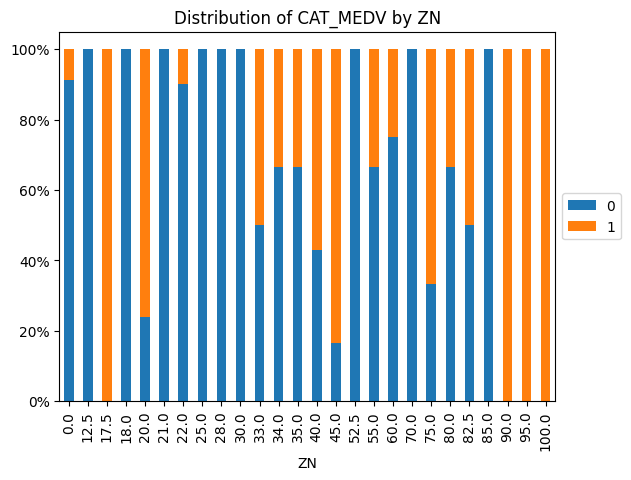

CAT_MEDV,0,1
ZN,,
0.0,0.911290,0.088710
12.5,1.000000,0.000000
17.5,0.000000,1.000000
18.0,1.000000,0.000000
20.0,0.238095,0.761905
21.0,1.000000,0.000000
22.0,0.900000,0.100000
25.0,1.000000,0.000000
28.0,1.000000,0.000000


In [27]:
propTbl = tbl / tbl.sum()
propTbl.round(2)
ax = propTbl.transpose().plot(kind='bar',stacked=True)
ax.set_yticklabels(['{:.0%}'.format(x) for x in ax.get_yticks()])
plt.title('Distribution of CAT_MEDV by ZN')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.show()
propTbl.transpose()